In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1. Exploratory Data Analysis

In [60]:
df = pd.read_csv('data.csv')
df=df.rename(columns={"CSUSHPINSA": "housing_price","observation_date": "date"})
df.head()

,date,housing_price
0,1987-01-01,63.755
1,1987-02-01,64.155
2,1987-03-01,64.490
3,1987-04-01,64.995
4,1987-05-01,65.569


In [63]:
df.describe()

,housing_price
count,393.000000
mean,126.874893
std,44.300535
min,63.755000
25%,80.346000
50%,131.841000
75%,166.676000
max,212.203000


In [62]:
df['date']=pd.DatetimeIndex(df['date'])

In [64]:
df.isnull().sum()

date             0
housing_price    0
dtype: int64

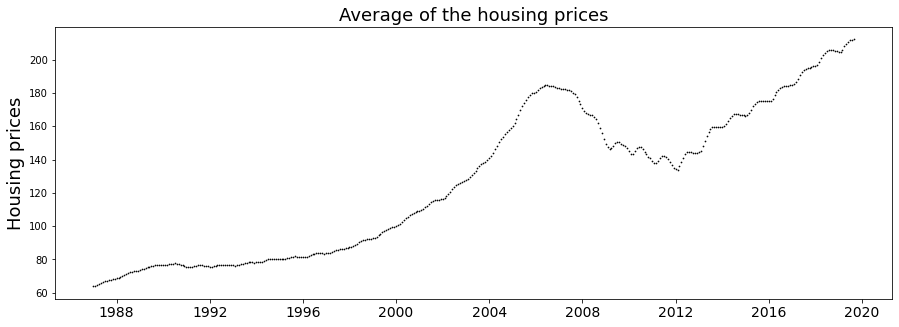

In [97]:
import matplotlib.dates as mdates
def scatplot(x,y,s=0.5):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.scatter(x,y,color='black', s=s)
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    plt.ylabel('Housing prices',fontsize=18)
    plt.title('Average of the housing prices',fontsize=18)
    _=plt.xticks(fontsize=14)
scatplot(df.date,df.housing_price)

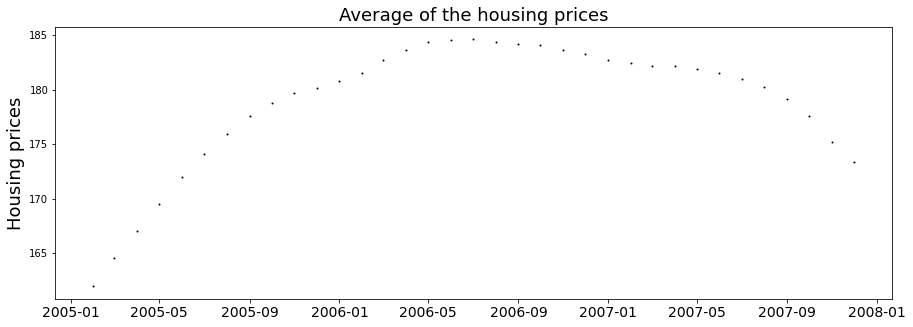

In [98]:
dft = df[(df.date>'2005')&(df.date<'2008')]
scatplot(dft.date,dft.housing_price,s=1)
fig.autofmt_xdate()

In [68]:
from pandas import Series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [71]:
t = difference(df.housing_price)

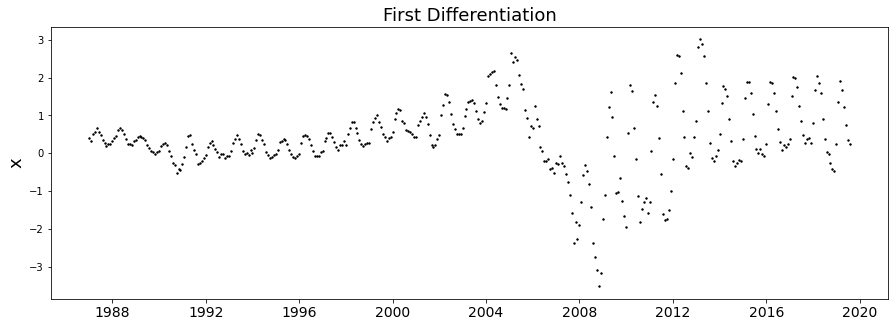

In [99]:
scatplot(df.date[0:392],t,s=2)
plt.ylabel('x',fontsize=18)
_=plt.title('First Differentiation',fontsize=18)

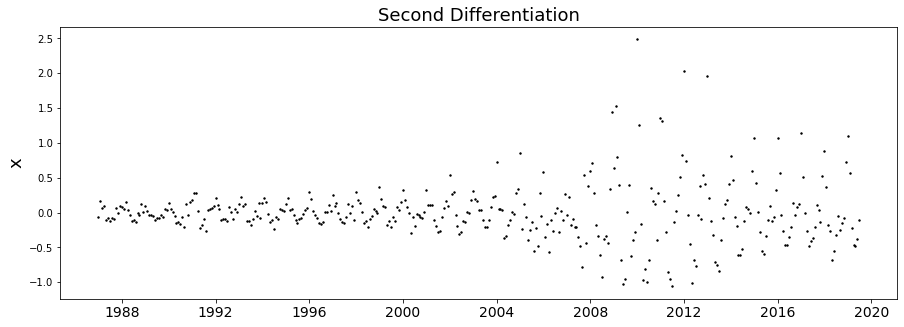

In [100]:
t2 = difference(t)
scatplot(df.date[0:391],t2,s=2)
plt.ylabel('x',fontsize=18)
_=plt.title('Second Differentiation',fontsize=18)

In [102]:
# from statsmodels.graphics.tsaplots import plot_acf
# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
# plot_acf(series)
# pyplot.show()